## Predictive Analytics Template - Structured Data

* <ins>Author</ins>: Duncan Calvert
* <ins>Last Modified</ins>: 9/24/24

This article is part of my series Watch One, Do One, Teach One (WDT), A data science series focused around helping beginner data scientist learn AI concepts, practice implementing them, and then teach the concept to others in order to cement their understanding. 

This specific template is meant to be used for predictive analytics/ML with structured data sets. It has the following sections

## Table of Contents
1. [Library Imports](#1-package-imports-and-installs)
2. [Configurations](#2-configurations)
3. [Downloading the Data Set](#3-downloading-the-data-set)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    - [4a. Pandas EDA](#4a-pandas-eda)
    - [4b. AutoViz](#4b-autoviz)
5. [Data Cleaning](#5-data-cleaning)
6. [Feature Engineering](#6-feature-engineering)
7. [AutoML](#7-automl)
8. [Iterative Modeling and Hyperparameter Tuning](#8-iterative-modeling-and-hyperparameter-tuning)
9. [Explainability](#9-explainability)
10. [Summary and Lessons Learned](#10-summary-and-lessons-learned)

## 1. Package Imports and Installs

In [1]:
# !pip install -r requirements.txt

In [2]:
# Data Imports
from palmerpenguins import load_penguins

# General packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# AutoEDA Tools
from autoviz import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## 2. Configurations

In [3]:
# sets the max column count, allowing us to control truncation and visibility
pd.set_option('display.max_columns', None) 

# allows the dataframe to stretch across multiple pages
pd.set_option('display.expand_frame_repr', False) 

# sets the maximum width of columns, allowing us to control visibility
pd.set_option('max_colwidth', None) 

# display numbers to a higher precision
pd.options.display.float_format = '{:,.7}'.format 

## 3. Downloading the Data Set

#### Loading a toy data set

In [4]:
# Load the toy pandas data set from the palmerpenguins package
df = load_penguins()

#### Loading a CSV/Excel

#### Loading an Excel

In [5]:
# df = pandas.read_excel('<Insert Excel File Name>.xlsx',sheet_name = '<Insert tab name>')

#### Loading a Google Drive File

In [6]:
"""
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\n\n# Mount Google Drive\ndrive.mount('/content/drive')\n"

## Exploratory Data Analysis (EDA)

EDA is one of the most important parts of any data science workflow as understanding the nuances of your data, identifying potential biases, missing data, or issues with your data set is extremely important for all subsequent steps. 

* <ins>Note</ins>: Even before EDA, whenever possible, you should attempt to discuss any potential data quality, availability, or bias issue with any data subject matter experts that are available. This is important as there are often nuances and potential pitfalls in the way data is collected and cataloged that may not be apparent from code-based EDA.

### 4a. Pandas EDA

#### Shape
The "shape" attribute gives the axis dimensions of the object, consistent with ndarray allowing us to quickly guage the size of our data set

In [7]:
df.shape

(344, 8)

#### Head/Tail
The "head" and "tail" methods allow us to view a small sample of a Series or DataFrame object with the default length being 5. You can pass a parameter to the methods to increase/decrease their row count. These methods allow us to quickly get a sense of the columns/features available and what a few examples of the data set look like.

In [8]:
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,"3,750.0",male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,"3,800.0",female,2007


#### Info
The "info" method provides us with column level info on our dataframe, specifically data types, null count, and indexes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#### Describe
The "describe" method provides common summary statistics of your dataframes features. It is primarily used with numeric data sets

In [10]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.0,342.0,342.0,342.0,344.0
mean,43.92193,17.15117,200.9152,"4,201.754","2,008.029"
std,5.459584,1.974793,14.06171,801.9545,0.8183559
min,32.1,13.1,172.0,"2,700.0","2,007.0"
25%,39.225,15.6,190.0,"3,550.0","2,007.0"
50%,44.45,17.3,197.0,"4,050.0","2,008.0"
75%,48.5,18.7,213.0,"4,750.0","2,009.0"
max,59.6,21.5,231.0,"6,300.0","2,009.0"


### 4b. AutoViz

AutoViz is an automated vizualisation package that gives a quick interactive overview of your data

Shape of your Data Set loaded: (344, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
species,object,0.000000,0,,,No issue
island,object,0.000000,0,,,No issue
bill_length_mm,float64,0.581395,NA,32.100000,59.600000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123."
bill_depth_mm,float64,0.581395,NA,13.100000,21.500000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123."
flipper_length_mm,float64,0.581395,NA,172.000000,231.000000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123."
body_mass_g,float64,0.581395,NA,2700.000000,6300.000000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has a high correlation with ['flipper_length_mm']. Consider dropping one of them."
sex,object,3.197674,0,,,"11 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
year,int64,0.000000,0,2007.000000,2009.000000,Possible date-time colum: transform before modeling step.


Number of All Scatter Plots = 10


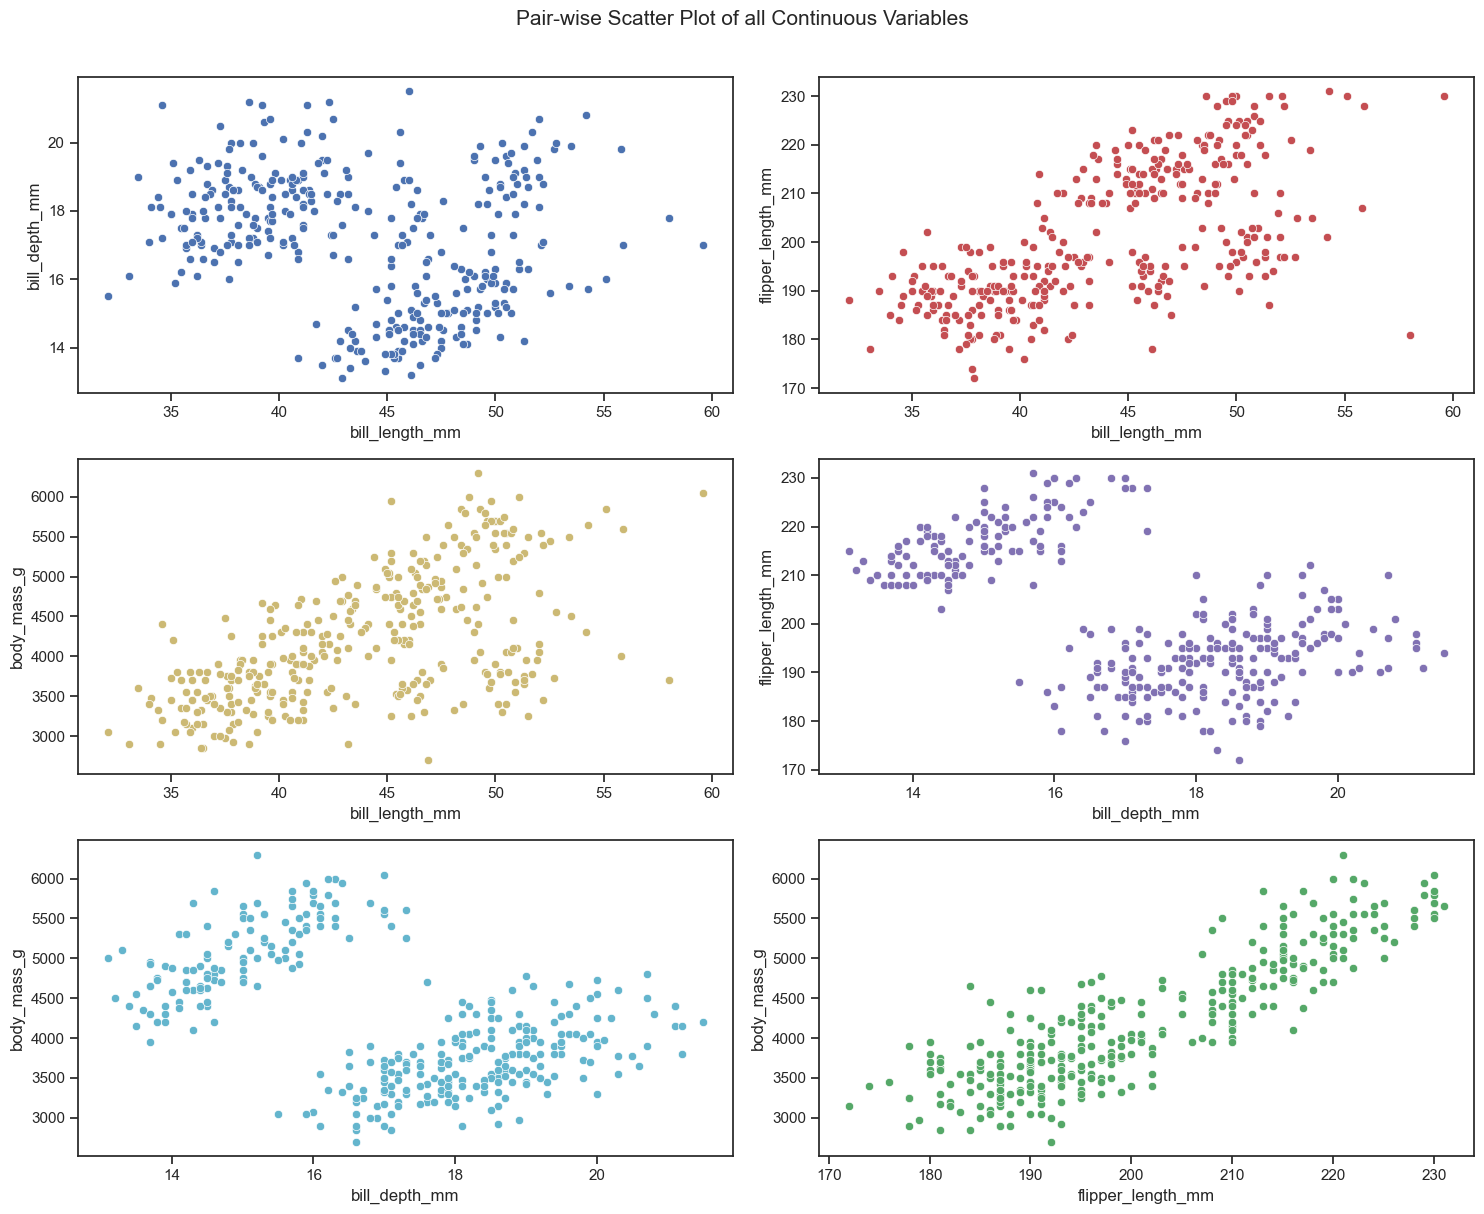

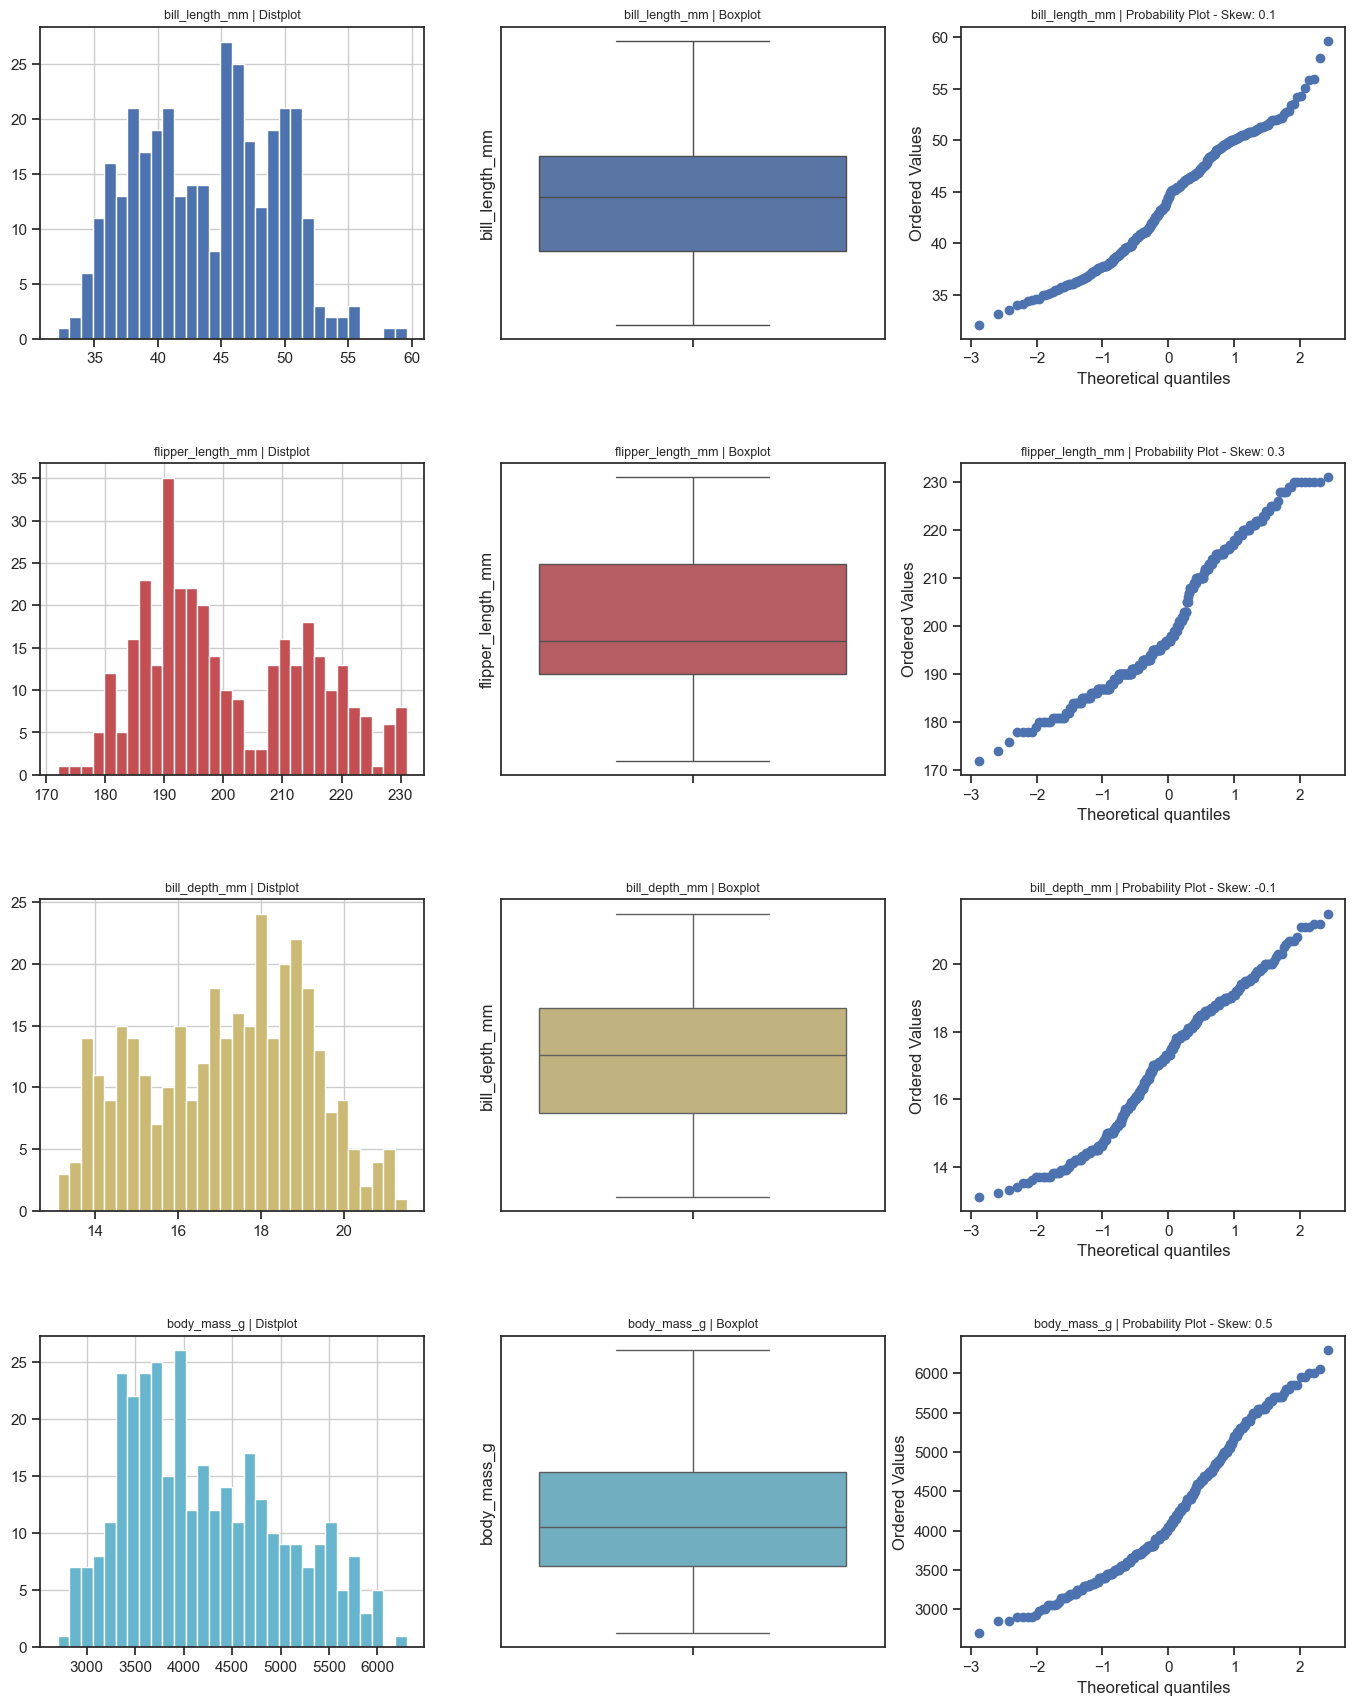

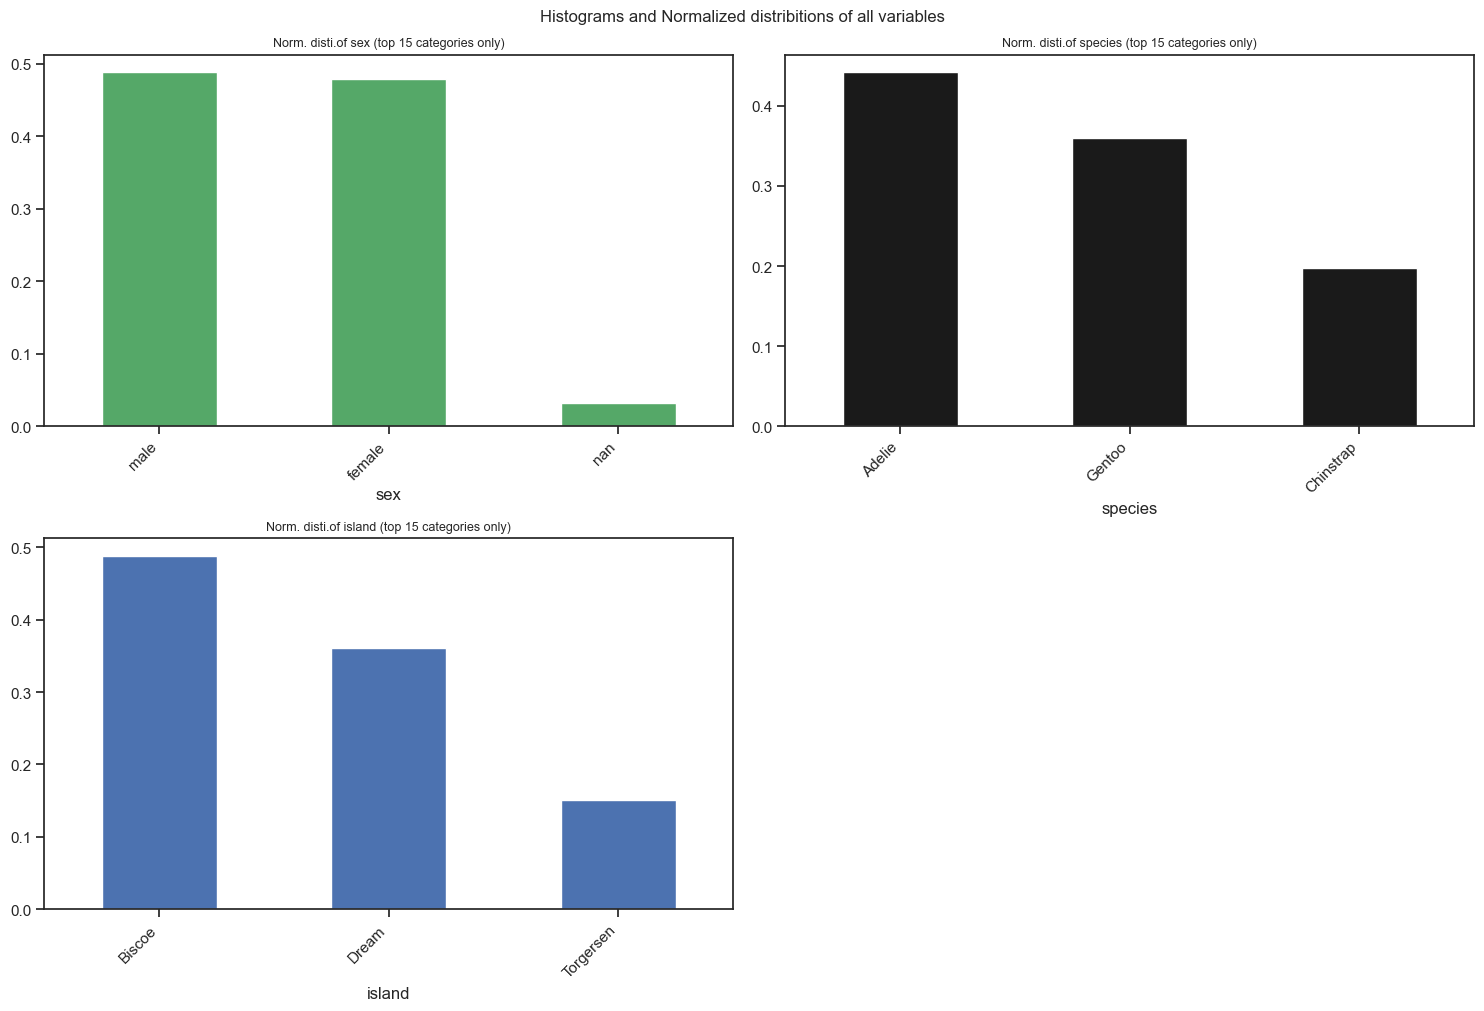

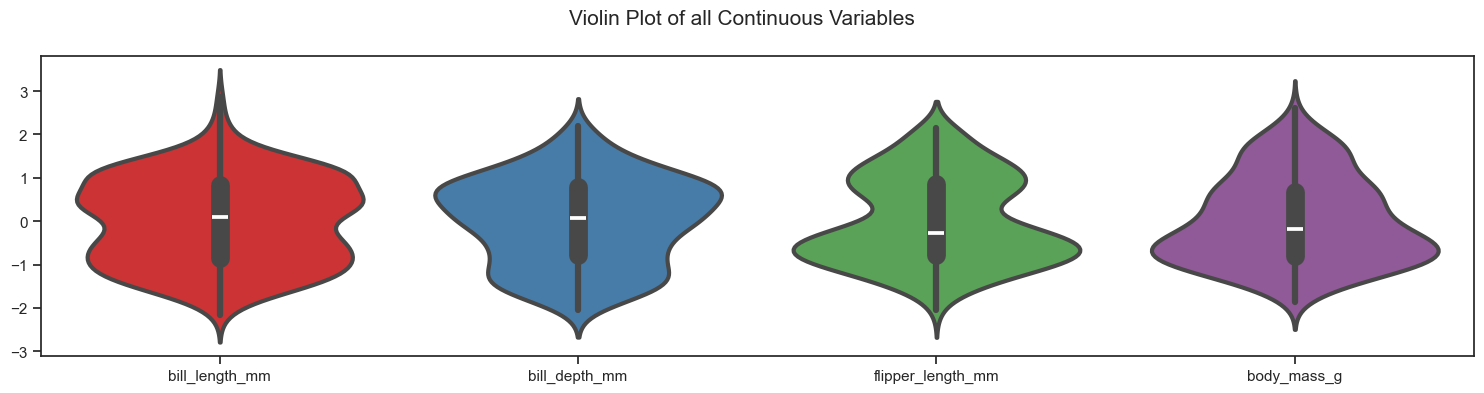

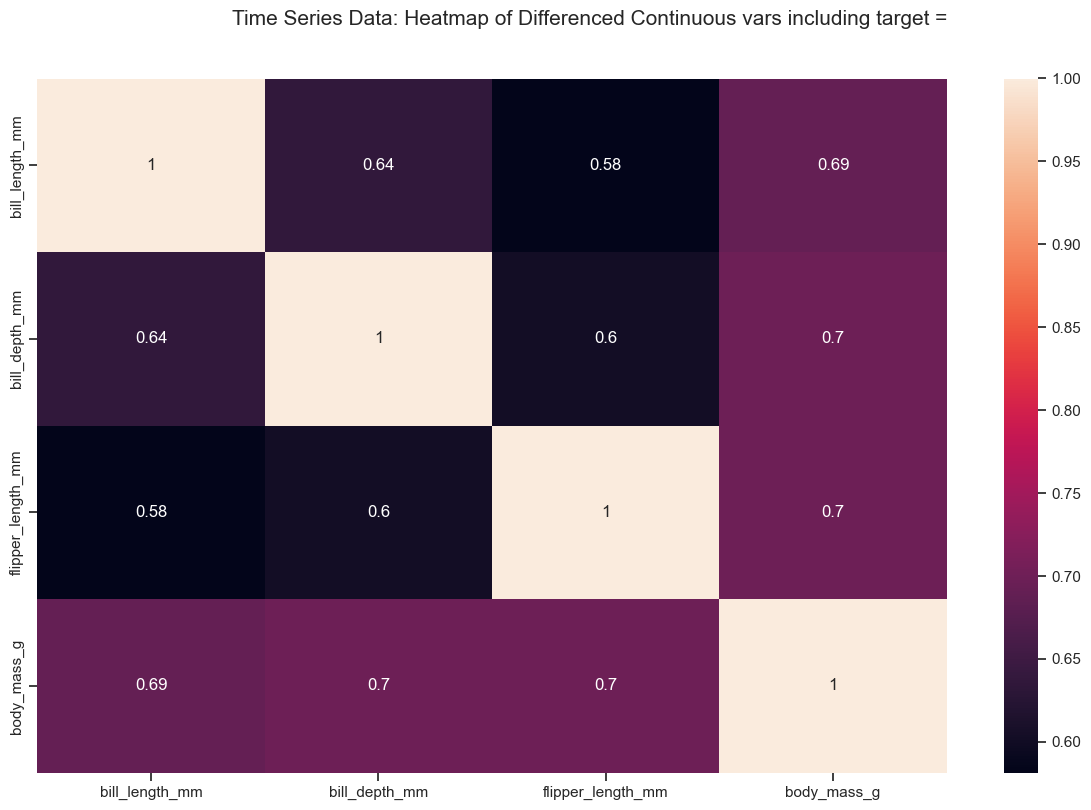

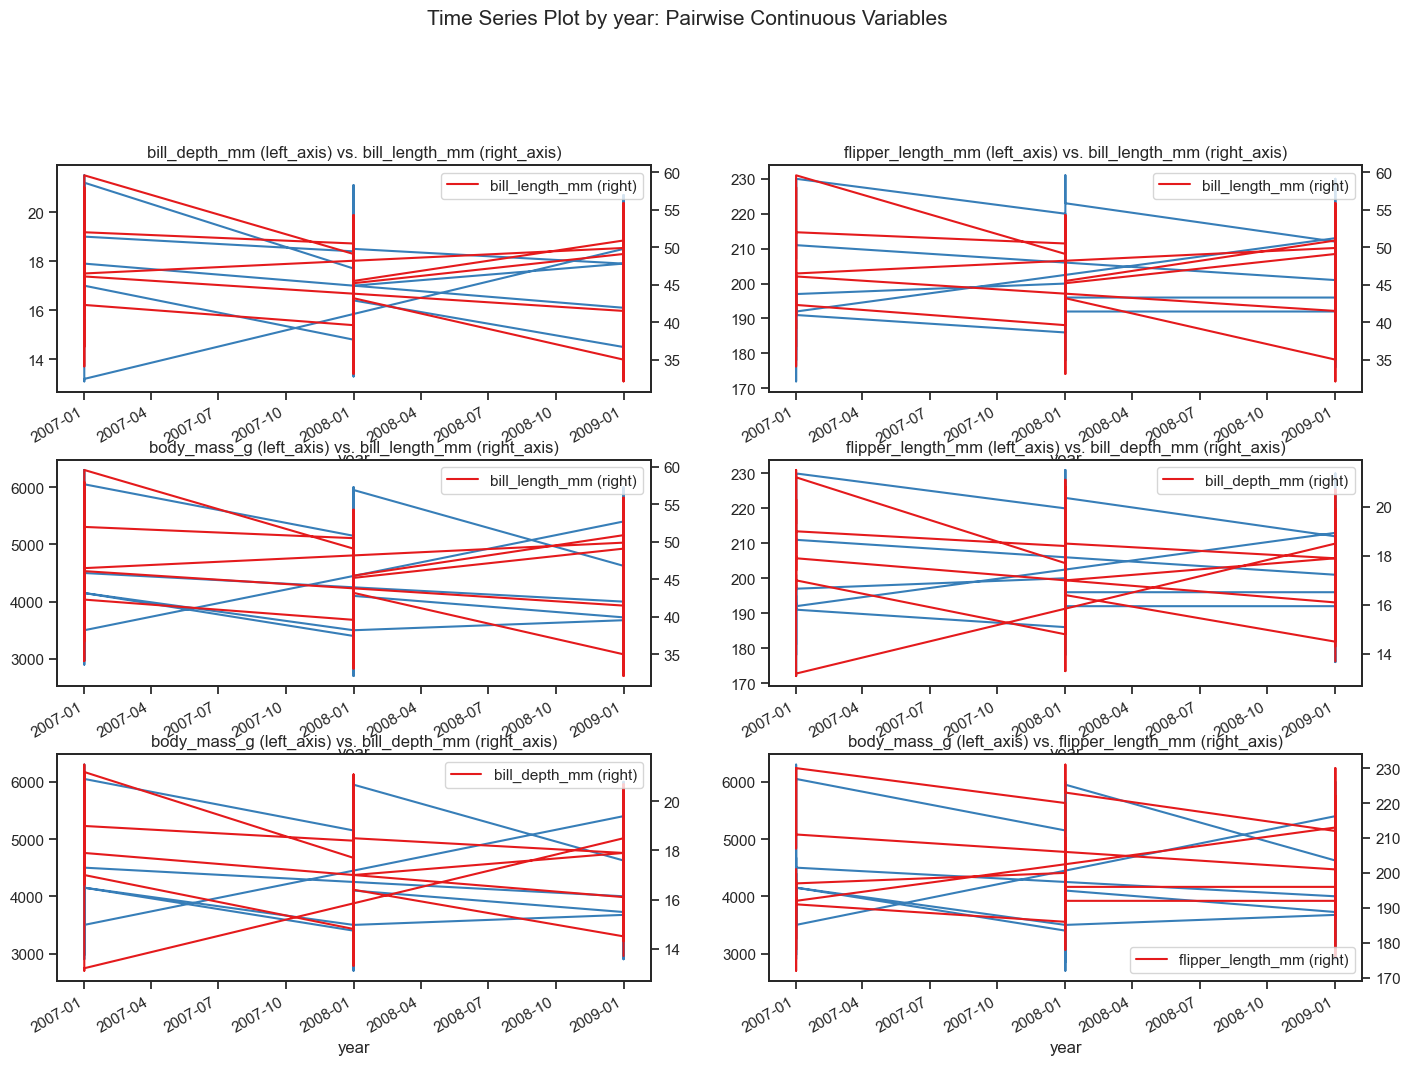

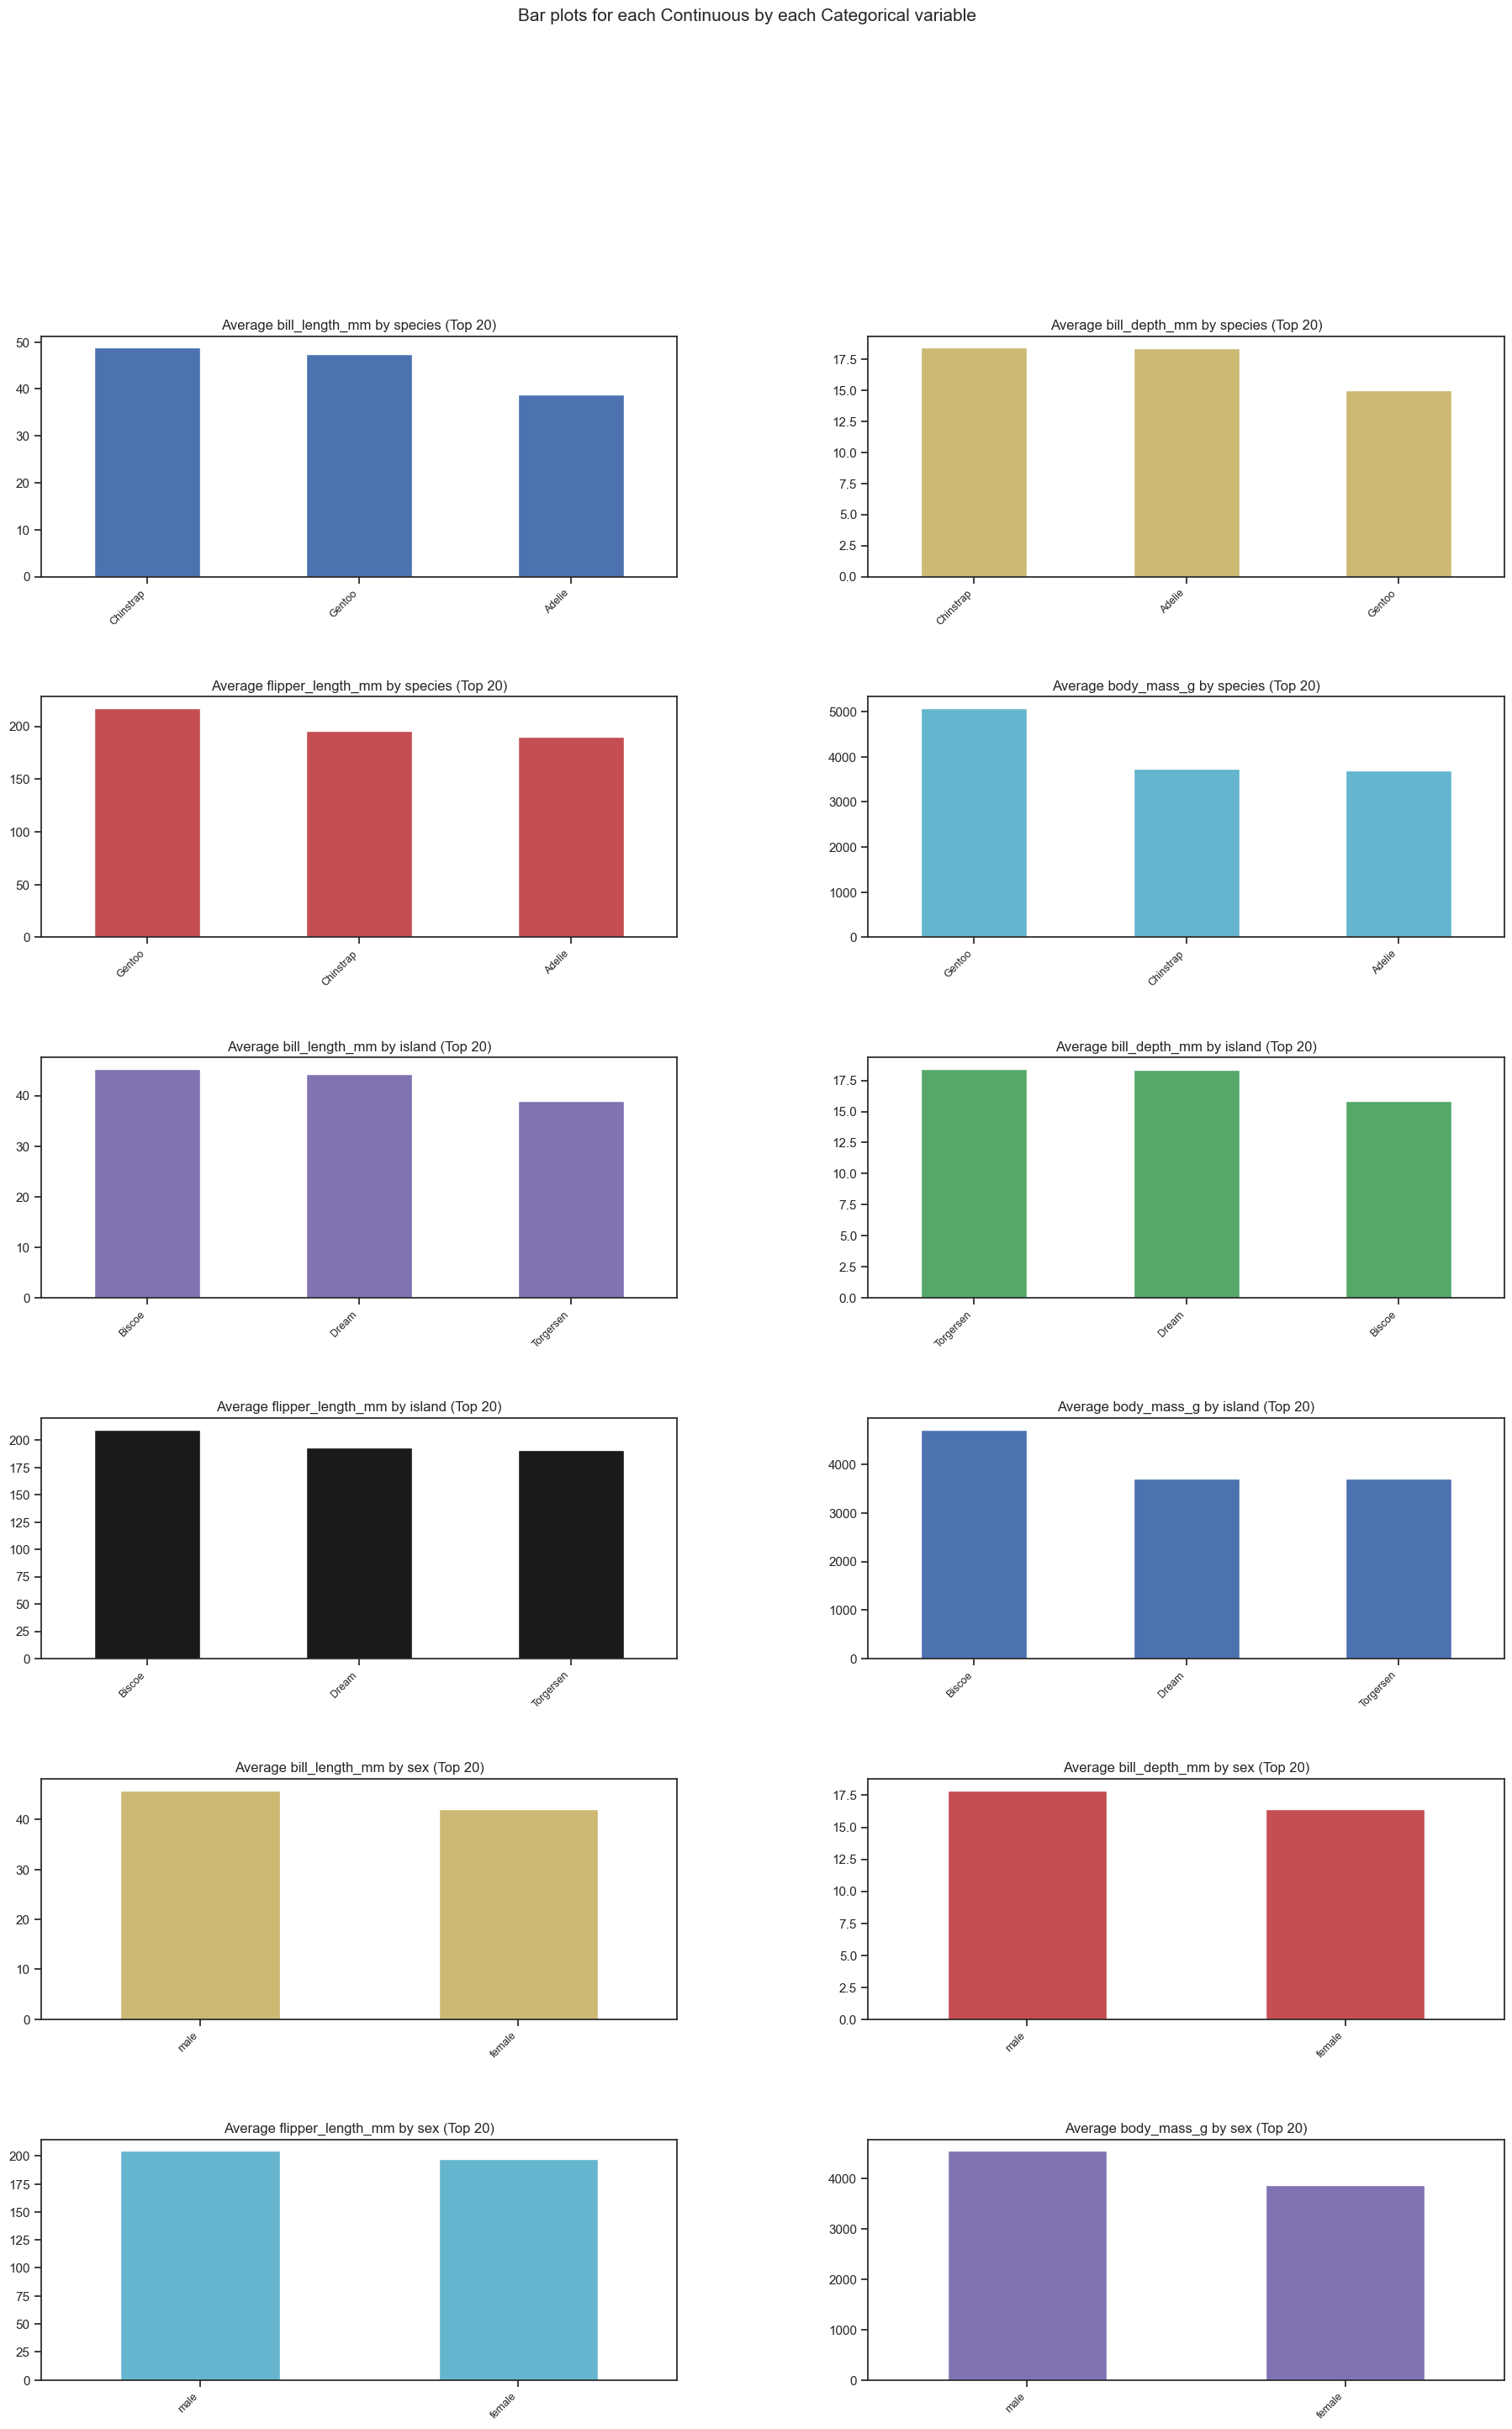

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [12]:
AV = AutoViz_Class()
%matplotlib inline 

# Run AutoViz on the dataframe
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

## 5. Data Cleaning

## 6. Feature Engineering

## 7. AutoML

## 8. Iterative Modeling and Hyperparameter Tuning

## 9. Explainability

## 10. Summary and Lessons Learned